## Project 1, Group 3 - Places to Bike
Overview
Biking is becoming more prevalent as a form of commuting to work, exercise, traveling, and for leisure. In this project, our group explored cities that were considered "bike-friendly" based on the Places for Bikes city ratings to see if there is any relationships to obesity rates in the U.S.



In [112]:
# Import dependencies
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
#import gmaps

#from config import gkey

from datetime import datetime

### Bike Friendlines Score data
Shoua

In [113]:
# Store filepath as variable
places_for_bikes = "data/places_for_bikes_results.csv"

In [114]:
# Read data with Pandas
bike_data = pd.read_csv(places_for_bikes, encoding="ISO-8859-1")

# Display 10 rows of data
bike_data.head(5)

,Places_ID_2019,City,City_Alt,ACS Bike-to-Work Mode Share,Land Area,Population,ACS Target,ACS Normalized Score,ACS Ridership Points,SMS Recreation Riding,...,ACS Bike-to-Work Mode Share Men,ACS Bike-to-Work Mode Share Women,ACS Gap,ACS Tier,ACS_Target,Distance.1,ACS Points,Total Reach Points,Bonus,Total Ponts
0,363,"SPRINGDALE, ARKANSAS","SPRINGDALE, AR",0.30%,41.8,"77,252",12.60%,1.7,0.1,12.40%,...,0.01,0.00,0.01,1.0,-0.02,0.03,1.0,4.0,0.5,3.0
1,116,"ENID, OKLAHOMA","ENID, OK",0.70%,73.7,"50,809",11.50%,5.5,0.3,13.00%,...,0.01,0.00,0.01,2.0,-0.05,0.06,1.2,3.8,0.0,2.4
2,108,"DUBUQUE, IOWA","DUBUQUE, IA",0.40%,30.0,"58,410",20.80%,2.0,0.1,16.50%,...,0.00,0.00,0.00,1.0,-0.02,0.02,1.7,3.8,0.0,2.1
3,357,"SOUTH BEND, INDIANA","SOUTH BEND, IN",1.30%,41.5,"101,928",12.60%,7.8,0.4,15.80%,...,0.02,0.01,0.02,3.0,-0.60,0.62,3.1,3.7,0.0,2.0
4,1205,"CRESTED BUTTE, COLORADO","CRESTED BUTTE, CO",41.10%,0.8,"1,385",51.00%,75.6,3.8,18.80%,...,0.36,0.52,-0.16,3.0,-0.60,0.44,3.6,3.6,0.0,2.6


In [115]:
# Renaming column
bike_data_df = bike_data.rename(columns={"Total Ponts":"Total Points", " Population ":"Population"})
bike_data_df.head()

,Places_ID_2019,City,City_Alt,ACS Bike-to-Work Mode Share,Land Area,Population,ACS Target,ACS Normalized Score,ACS Ridership Points,SMS Recreation Riding,...,ACS Bike-to-Work Mode Share Men,ACS Bike-to-Work Mode Share Women,ACS Gap,ACS Tier,ACS_Target,Distance.1,ACS Points,Total Reach Points,Bonus,Total Points
0,363,"SPRINGDALE, ARKANSAS","SPRINGDALE, AR",0.30%,41.8,"77,252",12.60%,1.7,0.1,12.40%,...,0.01,0.00,0.01,1.0,-0.02,0.03,1.0,4.0,0.5,3.0
1,116,"ENID, OKLAHOMA","ENID, OK",0.70%,73.7,"50,809",11.50%,5.5,0.3,13.00%,...,0.01,0.00,0.01,2.0,-0.05,0.06,1.2,3.8,0.0,2.4
2,108,"DUBUQUE, IOWA","DUBUQUE, IA",0.40%,30.0,"58,410",20.80%,2.0,0.1,16.50%,...,0.00,0.00,0.00,1.0,-0.02,0.02,1.7,3.8,0.0,2.1
3,357,"SOUTH BEND, INDIANA","SOUTH BEND, IN",1.30%,41.5,"101,928",12.60%,7.8,0.4,15.80%,...,0.02,0.01,0.02,3.0,-0.60,0.62,3.1,3.7,0.0,2.0
4,1205,"CRESTED BUTTE, COLORADO","CRESTED BUTTE, CO",41.10%,0.8,"1,385",51.00%,75.6,3.8,18.80%,...,0.36,0.52,-0.16,3.0,-0.60,0.44,3.6,3.6,0.0,2.6


In [116]:
# Splitting City column to two new columns - City Name and State
#bike_split = bike_data_df
#bike_split[['City Name','State']] = bike_split["City"].str.split(",", n=1, expand=True)
#bike_split.head()

In [117]:
# Re-organizing columns and keeping columns that are relevant to our research question. In this dataframe
# we only want to focus on these columns in this dataset: City_Alt, Population, and Total Bike Friendly Points.
bike_df = bike_data_df[['City_Alt', 'Population', 'Total Points']]

bike_df.head(10)

,City_Alt,Population,Total Points
0,"SPRINGDALE, AR","77,252",3.0
1,"ENID, OK","50,809",2.4
2,"DUBUQUE, IA","58,410",2.1
3,"SOUTH BEND, IN","101,928",2.0
4,"CRESTED BUTTE, CO","1,385",2.6
5,"KALAMAZOO, MI","75,833",1.9
6,"SPRINGFIELD, MO","165,785",1.9
7,"SAN JUAN CAPISTRANO, CA","35,948",1.9
8,"CHARLOTTESVILLE, VA","46,487",1.8
9,"BENTONVILLE, AR","44,601",3.1


In [118]:
# Sort dataframe based on Total Points scored and Population size for Bike Friendliness
bike_total_points = bike_df.sort_values(["Total Points", "Population"], ascending=[False, False])
bike_total_points.head(10)

,City_Alt,Population,Total Points
69,"BOULDER, CO","106,271",3.7
42,"FORT COLLINS, CO","159,150",3.6
201,"ARLINGTON, VA","229,534",3.4
244,"EUGENE, OR","163,135",3.4
407,"MANHATTAN, NY","1,653,877",3.4
153,"LAWRENCE, KS","93,954",3.3
372,"PORTLAND, OR","630,331",3.3
114,"BROOKLYN, NY","2,635,121",3.3
297,"MINNEAPOLIS, MN","411,452",3.2
204,"MADISON, WI","248,856",3.2


### Distribution of Bike Score points
Joaquin

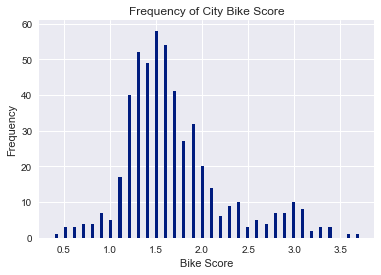

In [119]:
# Visualizing dataset for the Bike Friendliness Score dataset
score = bike_total_points['Total Points'].tolist()
score

form = dict(alpha=1, bins=100)
plt.gca().set(title='Frequency of City Bike Score',xlabel='Bike Score', ylabel='Frequency')
plt.hist(score, **form)

plt.show
plt.savefig('BikeScoreFreq.png')

### Obesity Rate data
Shoua

In [120]:
# Importing raw data for Obesity Rates
obesity_raw_data = "data/obesity_among_adults.csv"

In [121]:
# Read raw data into CSV file
obesity_data = pd.read_csv(obesity_raw_data, encoding="ISO-8859-1")
obesity_data.head()

,Year,StateAbbr,StateDesc,CityName,GeographicLevel,DataSource,Category,UniqueID,Measure,Data_Value_Unit,...,Data_Value_Footnote,Low_Confidence_Limit,High_Confidence_Limit,PopulationCount,GeoLocation,CategoryID,MeasureId,CityFIPS,TractFIPS,Short_Question_Text
0,2016,CO,Colorado,Boulder,City,BRFSS,Unhealthy Behaviors,807850,Obesity among adults aged >=18 Years,%,...,NaN,14.6,15.1,"97,385","(40.0275510494, -105.25151776)",UNHBEH,OBESITY,807850,NaN,Obesity
1,2016,CA,California,Fremont,City,BRFSS,Unhealthy Behaviors,626000,Obesity among adults aged >=18 Years,%,...,NaN,15.6,15.8,"214,089","(37.5278685405, -121.984121512)",UNHBEH,OBESITY,626000,NaN,Obesity
2,2016,CA,California,Milpitas,City,BRFSS,Unhealthy Behaviors,647766,Obesity among adults aged >=18 Years,%,...,NaN,15.7,16.2,"66,790","(37.433869763, -121.892083025)",UNHBEH,OBESITY,647766,NaN,Obesity
3,2016,CA,California,Irvine,City,BRFSS,Unhealthy Behaviors,636770,Obesity among adults aged >=18 Years,%,...,NaN,16.2,16.5,"212,375","(33.6780108904, -117.773633283)",UNHBEH,OBESITY,636770,NaN,Obesity
4,2016,CA,California,San Francisco,City,BRFSS,Unhealthy Behaviors,667000,Obesity among adults aged >=18 Years,%,...,NaN,17.1,17.2,"805,235","(37.7559136611, -122.440987876)",UNHBEH,OBESITY,667000,NaN,Obesity


In [122]:
# Re-naming column to align with Bike Friendly dataset.
obesity_data_rn = obesity_data.rename(columns={"StateDesc":"State", "CityName":"City Name",
                                               "Data_Value":"Obesity Rank", "PopulationCount":"Population"})

obesity_data_rn.head()

,Year,StateAbbr,State,City Name,GeographicLevel,DataSource,Category,UniqueID,Measure,Data_Value_Unit,...,Data_Value_Footnote,Low_Confidence_Limit,High_Confidence_Limit,Population,GeoLocation,CategoryID,MeasureId,CityFIPS,TractFIPS,Short_Question_Text
0,2016,CO,Colorado,Boulder,City,BRFSS,Unhealthy Behaviors,807850,Obesity among adults aged >=18 Years,%,...,NaN,14.6,15.1,"97,385","(40.0275510494, -105.25151776)",UNHBEH,OBESITY,807850,NaN,Obesity
1,2016,CA,California,Fremont,City,BRFSS,Unhealthy Behaviors,626000,Obesity among adults aged >=18 Years,%,...,NaN,15.6,15.8,"214,089","(37.5278685405, -121.984121512)",UNHBEH,OBESITY,626000,NaN,Obesity
2,2016,CA,California,Milpitas,City,BRFSS,Unhealthy Behaviors,647766,Obesity among adults aged >=18 Years,%,...,NaN,15.7,16.2,"66,790","(37.433869763, -121.892083025)",UNHBEH,OBESITY,647766,NaN,Obesity
3,2016,CA,California,Irvine,City,BRFSS,Unhealthy Behaviors,636770,Obesity among adults aged >=18 Years,%,...,NaN,16.2,16.5,"212,375","(33.6780108904, -117.773633283)",UNHBEH,OBESITY,636770,NaN,Obesity
4,2016,CA,California,San Francisco,City,BRFSS,Unhealthy Behaviors,667000,Obesity among adults aged >=18 Years,%,...,NaN,17.1,17.2,"805,235","(37.7559136611, -122.440987876)",UNHBEH,OBESITY,667000,NaN,Obesity


In [123]:
# Create new dataframe with needed columns 
obesity_data_df = obesity_data_rn[['City Name', 'State', 'Population', 'Obesity Rank']]

# Sort columns based on Obesity Rank
obesity_data_df = obesity_data_df.sort_values(["Obesity Rank"], ascending=[True])

# Combining two columns into one to match with column from the Total Bike Score table to allow correct merge
obesity_data_df['City_Alt'] = obesity_data_df['City Name'] + ", " + obesity_data_rn['StateAbbr']

# Making new column all upper case to match with column from Total Bike Score table to allow correct merge
obesity_data_df['City_Alt'] = obesity_data_df['City_Alt'].str.upper()

obesity_data_df.head()

,City Name,State,Population,Obesity Rank,City_Alt
0,Boulder,Colorado,"97,385",14.9,"BOULDER, CO"
1,Fremont,California,"214,089",15.7,"FREMONT, CA"
2,Milpitas,California,"66,790",16.0,"MILPITAS, CA"
3,Irvine,California,"212,375",16.4,"IRVINE, CA"
4,San Francisco,California,"805,235",17.1,"SAN FRANCISCO, CA"


In [124]:
# Show bike table again for easy comparision with obesity table above
bike_df.head()
#bike_df.columns

,City_Alt,Population,Total Points
0,"SPRINGDALE, AR","77,252",3.0
1,"ENID, OK","50,809",2.4
2,"DUBUQUE, IA","58,410",2.1
3,"SOUTH BEND, IN","101,928",2.0
4,"CRESTED BUTTE, CO","1,385",2.6


### Distribution of Obesity Rate points
Joaquin

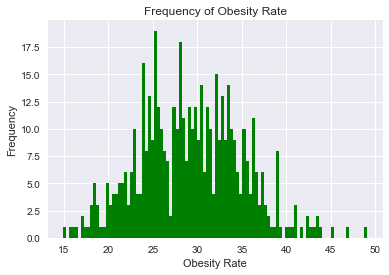

In [125]:
# Visualizing dataset for Obesity Rate dataset
obese = obesity_data_df['Obesity Rank'].tolist()
obese

form = dict(alpha=1, bins=100)
plt.gca().set(title='Frequency of Obesity Rate',xlabel='Obesity Rate', ylabel='Frequency')
plt.hist(obese, **form, color='g')

plt.show
plt.savefig('ObesityRateFreq.png')

### Combined datasets - Bike Friendliness Score and Obesity Rate
Sue

In [126]:
# Merge two dataframe using merge and inner because we want to show data from both
merge_data = pd.merge(bike_df, obesity_data_df, on="City_Alt", how="inner")

merge_data.head()
# Keep only columns needed
merge_data = merge_data[['City_Alt', 'Population_x', 'Total Points', 'Obesity Rank']]

# Renaming columns
#merge_data.rename(columns={"Population_x":"Population"})

# Creating new dataframe to keep columns needed
data_table_to_use = merge_data[['City_Alt', 'Population_x', 'Total Points', 'Obesity Rank']] 

# Display column names
data_table_to_use = data_table_to_use.rename(columns={"Population_x":"Population"})
data_table_to_use.head()

,City_Alt,Population,Total Points,Obesity Rank
0,"SPRINGDALE, AR","77,252",3.0,35.7
1,"SOUTH BEND, IN","101,928",2.0,38.6
2,"KALAMAZOO, MI","75,833",1.9,37.4
3,"SPRINGFIELD, MO","165,785",1.9,32.4
4,"MEDFORD, OR","79,246",1.9,28.1


### Scatter plot of all cities and Bike Scores
Sue

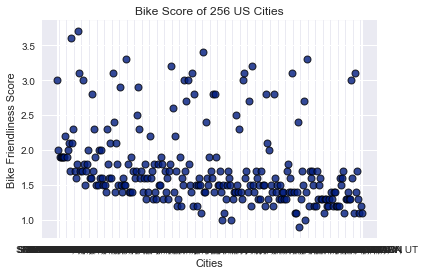

In [127]:
# Plotting the cities and their Bike Friendliness Score

plt.scatter(data_table_to_use['City_Alt'], data_table_to_use['Total Points'], edgecolor='black', linewidths=1,
            marker='o',cmap='plasma', alpha=0.8, label="Bike Score")

plt.style.use('seaborn')
plt.title(f'Bike Score of 256 US Cities')
plt.ylabel("Bike Friendliness Score")
plt.xlabel("Cities")
plt.grid(True)
plt.show()

### Scatter plot of all cities and their Obesity Rate %
Sue

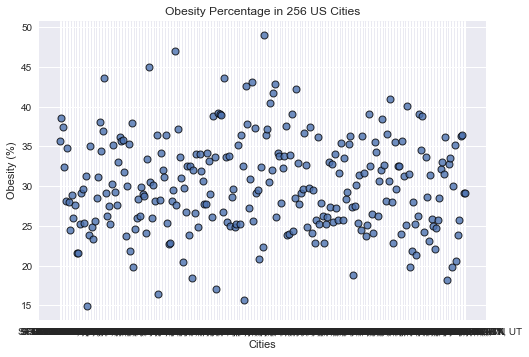

In [128]:
# Plotting the cities and their Obesity Percentage 

plt.scatter(data_table_to_use['City_Alt'], data_table_to_use['Obesity Rank'], edgecolor='black', linewidths=1,
            marker='o',cmap='viridis', alpha=0.8, label="Bike Score")

plt.style.use('seaborn-dark-palette')
plt.title(f'Obesity Percentage in 256 US Cities')
plt.ylabel("Obesity (%)")
plt.xlabel("Cities")
plt.grid(True)
plt.show()

## Binning the data
Sue

In [129]:
# Binning of Bike Friendliness Score distribution 
bins_bike = [0, .4, .9, 1.4, 1.9, 2.4, 2.9, 3.4, 3.9, 8]
bins_name = ['<.5', '.5-.9', '1-1.4', '1.5-1.9', '2-2.4','2.5-2.9','3-3.4', '3.5-3.9', '>4']

# Slice data and place into bins
data_table_to_use['Total Points'] = pd.cut(data_table_to_use["Total Points"], bins_bike, labels=bins_name)

# Group by total points and count by how many cities have total point in each bin
bin_group_bike = data_table_to_use.groupby('Total Points')
count_cat = bin_group_bike['Total Points'].count()

# Create new df to show bin df
bike_analysis_df = pd.DataFrame(count_cat)
bike_analysis_df

bike_analysis_df.rename(columns={"Total Points":"City_Count"})

,City_Count
Total Points,
<.5,0
.5-.9,1
1-1.4,94
1.5-1.9,115
2-2.4,22
2.5-2.9,14
3-3.4,17
3.5-3.9,2
>4,0


In [130]:
# Binning of chart of Obesity Rate distribution
bins_obesity = [0, 4, 9, 14, 19, 24, 29, 34, 39, 100]
bins_obesity_name = ['<4', '5-9', '10-14', '15-19', '20-24','25-29','30-34', '35-39', '>40']

# Reset index from previous binning
data_table_to_use = data_table_to_use.reset_index(drop=True)

# Group by total points and count by how many cities have total point in each bin
data_table_to_use['Obesity Rank'] = pd.cut(data_table_to_use["Obesity Rank"], bins_obesity, labels=bins_obesity_name)

# sort by obesity rank and then count how many cities are in each bin
bin_group_obesity = data_table_to_use.groupby('Obesity Rank')
count_cat = bin_group_obesity['Obesity Rank'].count()

# Create new df to showcase data
obesity_analysis_df = pd.DataFrame(count_cat)
obesity_analysis_df

obesity_analysis_df.rename(columns={"Obesity Rank":"Rank"})

,Rank
Obesity Rank,
<4,0
5-9,0
10-14,0
15-19,7
20-24,28
25-29,85
30-34,79
35-39,48
>40,18


### Minneapolis compard to the five cities with the least Obesity Rate
William

In [131]:
# Bar Chart of Five Least Obese Cities
obesity_percentage = [14.9, 15.7, 16.0, 16.4, 17.1, 25.3]
x_axis = np.arange(len(obesity_percentage))

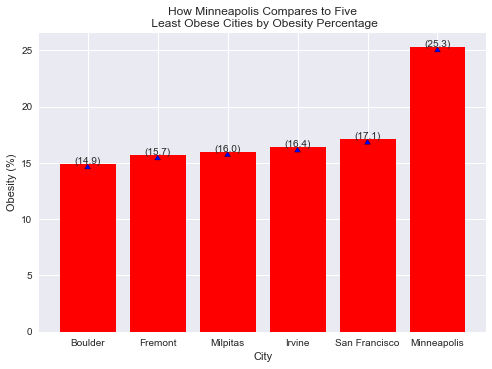

In [132]:
# Plotting and Formatting Chart
plt.bar(x_axis, obesity_percentage, color="r", align="center")

city_n=['city']
i=0
for xy in zip(x_axis, obesity_percentage):                                       
#     print(type(xy))
    plt.annotate('(%s)' % (obesity_percentage[i]), xy=xy,xytext=xy, textcoords='data',arrowprops=dict(facecolor='blue',headwidth=5.9, headlength=4.9),horizontalalignment='center') 
    i=i+1

# Setting Tick Locations
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["Boulder", "Fremont", "Milpitas", "Irvine", "San Francisco", "Minneapolis"])

# Labeling and Titling Chart
plt.title("How Minneapolis Compares to Five\n Least Obese Cities by Obesity Percentage")
plt.xlabel("City")
plt.ylabel("Obesity (%)")
plt.savefig('Mpls_Obesity_compared.png')

In [133]:
# Preparing the x and y axis data for plot 
df0 = obesity_data_rn[['City Name','Population']]
df0["Population"] = df0["Population"].str.replace(",","").astype(float)
df1 = df0[:5]
df1 = df1.sort_values('Population',ascending=True)
df1

/Users/shouachang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,City Name,Population
2,Milpitas,66790.0
0,Boulder,97385.0
3,Irvine,212375.0
1,Fremont,214089.0
4,San Francisco,805235.0


In [134]:
# Obesity_percentage = [14.9, 15.7, 16.0, 16.4, 17.1]
obesity_data_rn.head()
df2 = obesity_data_rn[:5]

#Obesity_data_rn['Obesity Rank'].head()
df2.head()

,Year,StateAbbr,State,City Name,GeographicLevel,DataSource,Category,UniqueID,Measure,Data_Value_Unit,...,Data_Value_Footnote,Low_Confidence_Limit,High_Confidence_Limit,Population,GeoLocation,CategoryID,MeasureId,CityFIPS,TractFIPS,Short_Question_Text
0,2016,CO,Colorado,Boulder,City,BRFSS,Unhealthy Behaviors,807850,Obesity among adults aged >=18 Years,%,...,NaN,14.6,15.1,"97,385","(40.0275510494, -105.25151776)",UNHBEH,OBESITY,807850,NaN,Obesity
1,2016,CA,California,Fremont,City,BRFSS,Unhealthy Behaviors,626000,Obesity among adults aged >=18 Years,%,...,NaN,15.6,15.8,"214,089","(37.5278685405, -121.984121512)",UNHBEH,OBESITY,626000,NaN,Obesity
2,2016,CA,California,Milpitas,City,BRFSS,Unhealthy Behaviors,647766,Obesity among adults aged >=18 Years,%,...,NaN,15.7,16.2,"66,790","(37.433869763, -121.892083025)",UNHBEH,OBESITY,647766,NaN,Obesity
3,2016,CA,California,Irvine,City,BRFSS,Unhealthy Behaviors,636770,Obesity among adults aged >=18 Years,%,...,NaN,16.2,16.5,"212,375","(33.6780108904, -117.773633283)",UNHBEH,OBESITY,636770,NaN,Obesity
4,2016,CA,California,San Francisco,City,BRFSS,Unhealthy Behaviors,667000,Obesity among adults aged >=18 Years,%,...,NaN,17.1,17.2,"805,235","(37.7559136611, -122.440987876)",UNHBEH,OBESITY,667000,NaN,Obesity


### Minneapolis comparison to other cities
William

In [135]:
# Formed New Dataframe and Concatenated to Include Minneapolis Data  

dfa=obesity_data_rn[:5]
dfb=obesity_data_rn[136:137]
dfc=pd.concat([dfa,dfb])
dfd=dfc[['City Name','Population']]
dfd['Population']=dfd['Population'].str.replace(",","").astype(int)
dfe=dfd.sort_values(by='Population')
dfe=dfe.reset_index()
del dfe['index']
dfe

/Users/shouachang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


,City Name,Population
0,Milpitas,66790
1,Boulder,97385
2,Irvine,212375
3,Fremont,214089
4,Minneapolis,382578
5,San Francisco,805235


### Minneapolis Bike Friendliness Score compared to other cities
William

In [136]:
# Data Preparation Continued in Include Minneapolis Data
# Bike_Score=data_table_to_use['Total Points'] 

Pop_Series= ['Milpitas', 'Boulder','Irvine','Fremont','Minneapolis', 'San Francisco']
Bike_Score=['','3.7','1.9','1.5','3.2','2.2']
y_axis= dfe['Population']
y= list(y_axis)
df33=pd.DataFrame({'Bike_Score':Bike_Score,'Population':y,  'city':Pop_Series})
df33b=df33.sort_values(by='Bike_Score')
df33b

,Bike_Score,Population,city
0,,66790,Milpitas
3,1.5,214089,Fremont
2,1.9,212375,Irvine
5,2.2,805235,San Francisco
4,3.2,382578,Minneapolis
1,3.7,97385,Boulder


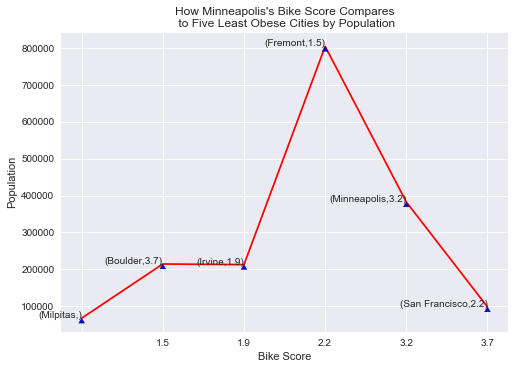

In [137]:
#Plotting Bike Scores of Five Least Obese Cities by Population including Minneapolis

#Setting x and y axis for plotting
x_axis = df33b['Bike_Score']    
y_axis = df33b['Population']
plt.plot(x_axis, y_axis, color="r")

#Setting and Sorting Bike Scores by City

city_n=df33b['city']
i=0
for xy in zip(x_axis, y_axis):                                       

#Add City and Bike Score Values to Plot

    #     print(type(xy))
    plt.annotate('(%s,%s)' % (city_n[i],x_axis[i]), xy=xy,xytext=xy, textcoords='data',arrowprops=dict(facecolor='blue',headwidth=5.9, headlength=4.9),horizontalalignment='right') 
    i=i+1

# tick_locations = [value for value in x_axis]
# plt.xticks(tick_locations, ['Boulder', 'Fremont', 'Milpitas', 'Irvine', 'San Francisco'])
#Labeling and Titling Chart

plt.title("How Minneapolis's Bike Score Compares\n to Five Least Obese Cities by Population")
plt.xlabel("Bike Score")
plt.ylabel("Population")

plt.savefig('Mpls_BikeScore_compared.png')

### Comparing the 5 High Obesity Rate and 5 Low Obesity Rate cities
Brandon

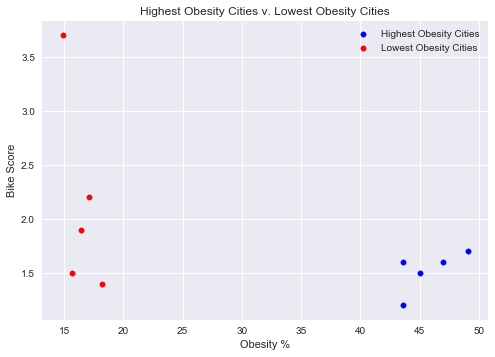

In [138]:
# Comparing High and Low Obesity Rate cities
high_obesity = [49.1, 47.0, 45.0, 43.6, 43.6]
bike_score1 = [1.7, 1.6, 1.5, 1.6, 1.2]
low_obesity = [14.9, 15.7, 16.4, 17.1, 18.2]
bike_score2 = [3.7, 1.5, 1.9, 2.2, 1.4]

plt.scatter(high_obesity, bike_score1, label="Highest Obesity Cities", s=30, color='blue')
plt.scatter(low_obesity, bike_score2, s=30, label="Lowest Obesity Cities", color='r')

plt.xlabel("Obesity %")
plt.ylabel("Bike Score")
plt.legend()

plt.title("Highest Obesity Cities v. Lowest Obesity Cities")
plt.savefig('obesityvbikescore.png')

### Scatter plot with trend line
Joaquin

In [139]:
# Dataframe to start the scatter plot with trend line
merge_data = pd.merge(bike_df, obesity_data_df, on="City_Alt", how="inner")

merge = merge_data[['City_Alt','Total Points','Obesity Rank']]
merge.head()

,City_Alt,Total Points,Obesity Rank
0,"SPRINGDALE, AR",3.0,35.7
1,"SOUTH BEND, IN",2.0,38.6
2,"KALAMAZOO, MI",1.9,37.4
3,"SPRINGFIELD, MO",1.9,32.4
4,"MEDFORD, OR",1.9,28.1


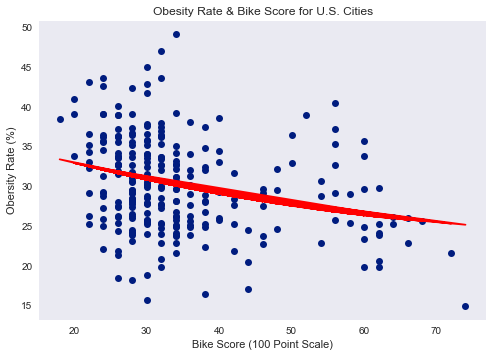

In [140]:
# Scatter plot with trend line between the Obesity Rate and Bike Score for U.S. cities
x = merge['Total Points']
y = merge['Obesity Rank']
xx = []
for i in x:
   xx.append(i*20)
xx

plt.plot(xx, y, "o")
z = np.polyfit(xx, y, 2)
p = np.poly1d(z)
plt.plot(xx,p(xx),"r")
plt.gca().set(title='Obesity Rate & Bike Score for U.S. Cities', xlabel='Bike Score (100 Point Scale)', ylabel='Obersity Rate (%)')
plt.grid()
plt.show
plt.savefig('ScatterPlot.png')

### Conclusion
The higher the Bike Score the lower the Obesity rate. We can infer that there is a slight inverse relationship between the two variable.